# 1. System commands can help you combine R and Python (or any other language/program)

In [143]:
# 1. System commands can help you combine R and Python (or any other language/program)
#####################################################################################
#?system()
#windows
#shell(command)
#or
#?system2()
y<-"helloworld"
name<-paste("python ", y, ".py",sep="") #helloworld.py has already been created
system(name)

# 2. Scraping pubmed or Google can be done directly with R or using Python commands


## 2.1. Scraping pubmed with R

In [144]:
library(RISmed)
#https://www.ncbi.nlm.nih.gov/pubmed/?term=calcul+quebec
?RISmed

In [145]:
g="Calcul quebec"

In [146]:
res <- EUtilsSummary(paste(g), db="pubmed", datetype='pdat', mindate=2000, maxdate=2015, retmax=500)
QueryCount(res)

[1] 21

In [147]:
# Access data by calling EUtilsGet() (it's slow!!)
# new object t that is a character vector containing all the publication titles by using the EUtilsGet() 
# function inside ArticleTitle().

In [148]:
t<-ArticleTitle(EUtilsGet(res))

In [149]:
typeof(t)

[1] "character"

In [150]:
head(t,1)

[1] "Determination of the Ratio of b-Quark Fragmentation Fractions f(s)/f(d) in pp Collisions at √s=7  TeV with the ATLAS Detector."

In [151]:
t[2]

[1] "Search for Dark Matter in Events with Missing Transverse Momentum and a Higgs Boson Decaying to Two Photons in pp Collisions at sqrt[s]=8 TeV with the ATLAS Detector."

In [152]:
y <- YearPubmed(EUtilsGet(res));y

[1] 2016 2015 2015 2015 2015 2015 2015 2015 2015 2014 2014 2014 2014 2014 2014
[16] 2014 2013 2013 2011 2003 2001

In [153]:
r <- YearReceived(EUtilsGet(res));r 

[1] 2015 2015 2015   NA 2015 2015 2015 2014 2014 2014 2014 2014 2014 2013 2013
[16] 2013   NA 2012   NA   NA 1999

In [156]:
library(ggplot2)
count<-as.data.frame(table(y))

In [157]:
names(count)<-c("Year", "Counts")

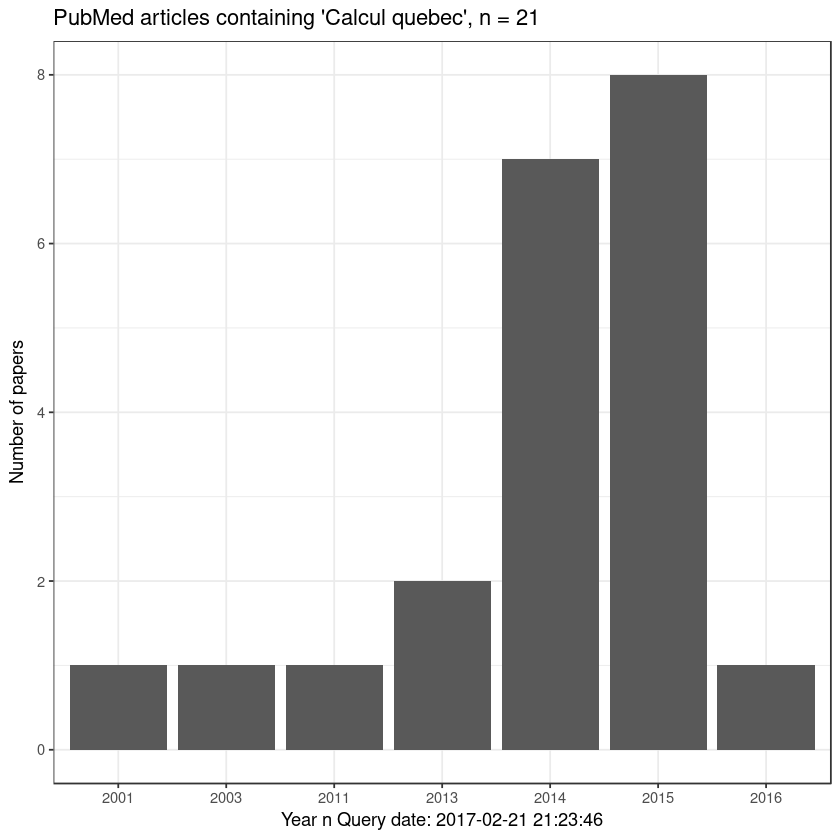

In [158]:
ggplot(data=count, aes(x=Year, y=Counts))+geom_bar(stat="identity")+ 
  labs(title=paste("PubMed articles containing '", g,"', n ", "= ", sum(count$Counts), sep=""))+
  ylab("Number of papers") +
  xlab(paste("Year n Query date: ", Sys.time(), sep="")) +
  labs(colour="") +
  theme_bw()

In [159]:
y #nb 21 was published before Calcul Quebec even existed
t[21]

[1] 2016 2015 2015 2015 2015 2015 2015 2015 2015 2014 2014 2014 2014 2014 2014
[16] 2014 2013 2013 2011 2003 2001

[1] "Conformational dynamics of an alanine dipeptide analog: an ab initio molecular dynamics study."

In [160]:
AbstractText(EUtilsGet(res))

[1] "With an integrated luminosity of 2.47  fb(-1) recorded by the ATLAS experiment at the LHC, the exclusive decays B(s)(0)→J/ψϕ and B(d)(0)→J/ψK(*0) of B mesons produced in pp collisions at √s=7  TeV are used to determine the ratio of fragmentation fractions f(s)/f(d). From the observed B(s)(0)→J/ψϕ and B(d)(0)→J/ψK(*0) yields, the quantity (f(s)/f(d))[B(B(s)(0)→J/ψϕ)/B(B(d)(0)→J/ψK(*0))] is measured to be 0.199±0.004(stat)±0.008(syst). Using a recent theory prediction for [B(B(s)(0)→J/ψϕ)/B(B(d)(0)→J/ψK(*0))] yields (f(s)/f(d))=0.240±0.004(stat)±0.010(syst)±0.017(th). This result is based on a new approach that provides a significant improvement of the world average."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [2] "Results of a search for new phenomena in events with large missing transverse momentum and a Higgs boson decaying to two photons are reported. Data from proton-proton collisions at a center-of-mass energy of 8 TeV and corresponding to an integrated luminosity of 20.3 fb^{-1} have been collected with the ATLAS detector at the LHC. The observed data are well described by the expected standard model backgrounds. Upper limits on the cross section of events with large missing transverse momentum and a Higgs boson candidate are also placed. Exclusion limits are presented for models of physics beyond the standard model featuring dark-matter candidates."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## 2.2. Scraping Google Scholar with Python and R

In [1]:
# with python
#############
## load libraries
library(reshape2)
library(plyr)

## step 1: data extraction

In [2]:
## load relevant databases
pilist<-read.csv("../files/scholar_python/pi_list2.csv", header = T)
test=list();pilist

pi_name,field,cpu_time
Alain deChamplain,Engineering,30187
Alain Gabler,Social Science,2011
Alexander Salenikovich,Engineering,2014
Alexandre Bureau,Mathematics and Statistics,8043
Arnaud Droit,Medical Science,32217
Augustin Gakwaya,Engineering,2014
Benoit Montreuil,Business Engineering,6044
Carl Duchesne,Engineering,2014
Carlos Ordas Criado,Social Science,4029
Caroline Duchaine,Biological and Life Sciences,8058


In [3]:
## run scholar py script as system command
scholar.it<-function(pi_list, start.year, end.year, n.authors){
  for (y in start.year:end.year){
    for (x in 121:126){
      print(x)
      for (z in 1:2){
        if (z==1){
          grab="all"
          piname=pi_list[x,1]
          scholar=system('python', c('../files/scholar_python/scholar.py', args =paste('-a ', piname,' -t --',grab, ' calcul quebec',' --after ',2013,' --no-patents --no-citations --csv-header',sep="")), stdout=TRUE)#change all or none according to your needs
          if (length(scholar)==0){
            print(paste("The PI named ", piname, " published nothing related to CQ in ", y, ".", sep=""))
            Sys.sleep(20)
          }else{
            schol.df=data.frame(scholar)
            schol.df$author=piname
            schol.df$author=as.character(schol.df$author)
            schol.df$year=y
            schol.df$year=as.character(schol.df$year)
            schol.df$keywd=grab
            schol.df$keywd=as.character(schol.df$keywd)
            schol.df[1,2]="authors"
            schol.df[1,3]="year"
            schol.df[1,4]="keywd"
            write.csv(schol.df, paste("../files/scholar_python/scholar_output/",y,"_",piname,"_CQ.csv", sep=""))
            Sys.sleep(20)
          }
        }else{
          grab="none"
          piname=pi_list[x,1]
          scholar=system('python', c('../files/scholar_python/scholar.py', args =paste('-a ', piname,' -t --', grab, ' calcul quebec',' --after ',2013,' --no-patents --no-citations --csv-header',sep="")), stdout=TRUE)#change all or none according to your needs
          if (length(scholar)==0){
            print(paste("The PI named ", piname, " didn't publish in ", y, ".", sep=""))
            Sys.sleep(60)
          }else{
            schol.df=data.frame(scholar)
            schol.df$author=piname
            schol.df$author=as.character(schol.df$author)
            schol.df$year=y
            schol.df$year=as.character(schol.df$year)
            schol.df$keywd=grab
            schol.df$keywd=as.character(schol.df$keywd)
            schol.df[1,2]="authors"
            schol.df[1,3]="year"
            schol.df[1,4]="keywd"
            write.csv(schol.df, paste("../files/scholar_python/scholar_output/",y,"_",piname,"_noCQ.csv", sep=""))
            Sys.sleep(60)
          }
        }
      }
    }
  }
}

In [4]:
scholar.it(pi_list = pilist,start.year = 2014,end.year = 2014,n.authors = nrow(pilist))

[1] 121


ERROR: Error in system("python", c("../files/scholar_python/scholar.py", args = paste("-a ", : unused argument (stdout = TRUE)


## step 2: data analysis

In [14]:
## merge all csv files into one data frame
multmerge = function(mypath){
  filenames=list.files(path=mypath, full.names=TRUE)
  datalist = lapply(filenames, function(x){read.csv(file=x,header=T, skip=1)})
  Reduce(function(...) rbind(...), datalist)}

In [22]:
schol.merge<-multmerge("../files/scholar_python/scholar_output")

In [23]:
nrow(schol.merge)

[1] 204

In [24]:
## split the "Scholar Column into multiple relevant columns using the separator
list <- strsplit(as.character(schol.merge$title.url.year.num_citations.num_versions.cluster_id.url_pdf.url_citations.url_versions.url_citation.excerpt), "\\|")

In [25]:
library("plyr")


In [26]:
df <- ldply(list)


In [27]:
colnames(df)<-c(unlist(strsplit("title.url.year.num_citations.num_versions.cluster_id.url_pdf.url_citations.url_versions.url_citation.excerpt","\\.")))

In [28]:
schol.res<-cbind(schol.merge[,3:5], df)

In [29]:
schol.res

authors,year,keywd,title,url,year,num_citations,num_versions,cluster_id,url_pdf,url_citations,url_versions,url_citation,excerpt
Chantal Mérette,2014,none,Gramsci and Marxist Theory (RLE: Gramsci),http://books.google.com/books?hl=en&lr=&id=7L5wAwAAQBAJ&oi=fnd&pg=PP1&dq=+-calcul+Chantal&ots=1usj-7wLM8&sig=Vv0tvMvwjrLIDLjgOkY3bXRGKhM,2014,442,4,13914153310065711684,None,"http://scholar.google.com/scholar?cites=13914153310065711684&as_sdt=2005&sciodt=1,5&hl=en","http://scholar.google.com/scholar?cluster=13914153310065711684&hl=en&as_sdt=1,5&as_ylo=2013&as_vis=1",None,"This book familiarizes the English-speaking reader with the debate on the originality of Gramsci's thought and its importance for the development of Marxist theory. The contributors present the principal viewpoints regarding Gramsci's theoretical contribution to Marxism, ..."
Chantal Mérette,2014,none,"Caractérisation du standard d'eau de rivière SLRS-5 (NRC-CNRC) compilation interlaboratoire du silicium, des terres rares et de 21 autres éléments en trace",http://scholar.google.com/https://hal-insu.archives-ouvertes.fr/insu-01080879/,2014,0,2,None,None,None,"http://scholar.google.com/scholar?cluster=5013944373656557983&hl=en&as_sdt=1,5&as_ylo=2013&as_vis=1",None,Le standard d'eau de rivière naturelle SLRS-5 (NRC-CNRC) est une référence de contrôle qualité en analyse d'eau de routine pour la communauté internationale. Dix laboratoires français étudiant les éléments majeurs et en trace dans les solutions naturelles (groupe ...
Chantal Mérette,2014,none,Middle East respiratory syndrome coronavirus neutralising serum antibodies in dromedary camels: a comparative serological study,http://www.sciencedirect.com/science/article/pii/S1473309913701646,2013,253,13,3761637667448986090,None,"http://scholar.google.com/scholar?cites=3761637667448986090&as_sdt=2005&sciodt=1,5&hl=en","http://scholar.google.com/scholar?cluster=3761637667448986090&hl=en&as_sdt=1,5&as_ylo=2013&as_vis=1",None,"Background A new betacoronavirus—Middle East respiratory syndrome coronavirus (MERS-CoV)—has been identified in patients with severe acute respiratory infection. Although related viruses infect bats, molecular clock analyses have been unable to identify direct ..."
Chantal Mérette,2014,none,Positively charged microbubbles to target nucleic acid delivery with ultrasound,http://scholar.google.com/https://hal-descartes.archives-ouvertes.fr/inserm-01154976/,2015,0,3,None,None,None,"http://scholar.google.com/scholar?cluster=16025990082741937237&hl=en&as_sdt=1,5&as_ylo=2013&as_vis=1",None,"Nucleic acid delivery in vivo via physical means or non-viral vectors still need improvements in particular to reach deep tissues. Sonoporation is highly advantageous for this purpose as ultrasound can be focalised to a particular tissue leading to targeted gene delivery, ..."
Chantal Mérette,2014,none,Combination of antidepressant medications from treatment initiation for major depressive disorder: a double-blind randomized study,http://ajp.psychiatryonline.org/doi/10.1176/appi.ajp.2009.09020186,2014,209,10,15786786548307928222,None,"http://scholar.google.com/scholar?cites=15786786548307928222&as_sdt=2005&sciodt=1,5&hl=en","http://scholar.google.com/scholar?cluster=15786786548307928222&hl=en&as_sdt=1,5&as_ylo=2013&as_vis=1",None,"Objective Various classes of antidepressant medications generally induce remission of major depressive disorder in only about one-third of patients. In a previous study using mirtazapine or paroxetine alone or in combination from treatment initiation, the rate of ..."
Chantal Mérette,2014,none,"Global, regional, and national disability-adjusted life years (DALYs) for 306 diseases and injuries and healthy life expectancy (HALE) for 188 countries, 1990–2013: …",http://www.sciencedirect.com/science/article/pii/S014067361561340X,2015,0,0,None,None,None,None,None,"Background The Global Burden of Disease Study 2013 (GBD 2013) aims to bring together all available epidemiological data using a coheren

In [30]:
schol.res<-rename(schol.res, replace = c("X4"="num_citations"))

The following `from` values were not present in `x`: X4
Warning message:
“The plyr::rename operation has created duplicates for the following name(s): (`year`)”

In [31]:
schol.res$num_citations<-as.numeric(schol.res$num_citations)

In [32]:
## compare citations between papers that do/don't mention CQ for the same authors
schol.citsum<-aggregate(data=schol.res, num_citations~authors+keywd, mean)

In [33]:
schol.ciinfo<-aggregate(data=schol.res, num_citations~keywd, count)

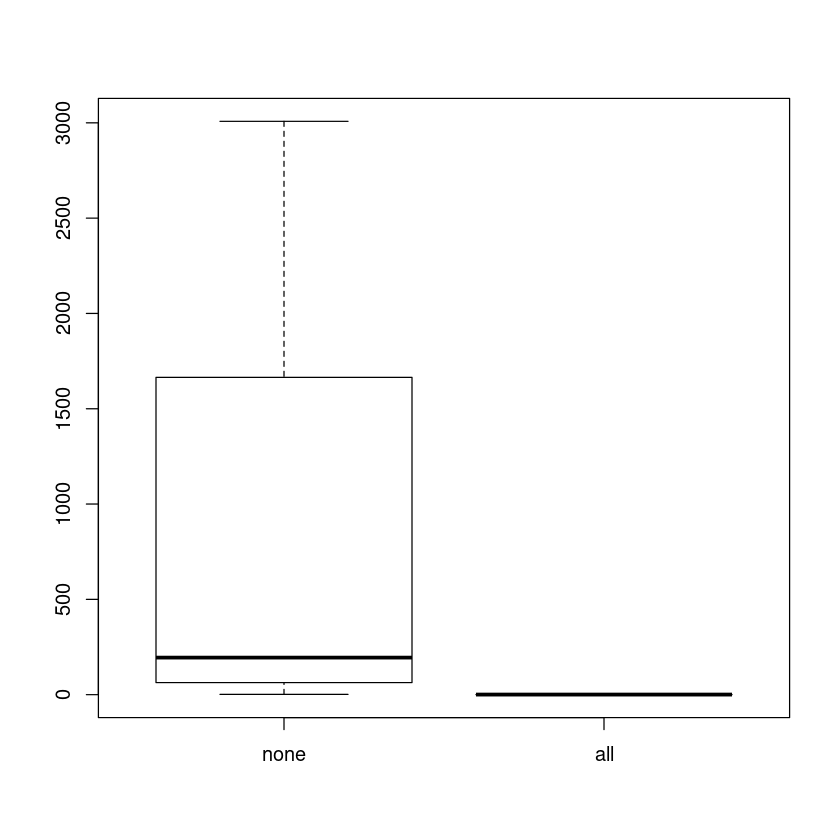

In [34]:
plot(y=schol.citsum$num_citations, x=schol.citsum$keywd)

# 3. Once you have retrieved the data you need, or if you already have files saved locally, you can do some text mining.

In [37]:
# 3.1. General text mining
Needed <- c("tm","RColorBrewer", "ggplot2", "wordcloud", "biclust", "cluster", "igraph", "fpc", "tm", "pdftools") 

In [38]:
lapply(Needed, library, character.only=TRUE)

Loading required package: NLP

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Loading required package: MASS
Loading required package: grid
Loading required package: colorspace
Loading required package: lattice

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[[1]]
 [1] "tm"        "NLP"       "RSelenium" "plyr"      "reshape2"  "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "RColorBrewer" "tm"           "NLP"          "RSelenium"    "plyr"        
 [6] "reshape2"     "stats"        "graphics"     "grDevices"    "utils"       
[11] "datasets"     "methods"      "base"        

[[3]]
 [1] "ggplot2"      "RColorBrewer" "tm"           "NLP"          "RSelenium"   
 [6] "plyr"         "reshape2"     "stats"        "graphics"     "grDevices"   
[11] "utils"        "datasets"     "methods"      "base"        

[[4]]
 [1] "wordcloud"    "ggplot2"      "RColorBrewer" "tm"           "NLP"         
 [6] "RSelenium"    "plyr"         "reshape2"     "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[5]]
 [1] "biclust"      "lattice"      "colorspace"   "grid"         "MASS"        
 [6] "wordcloud"    "ggplot2"      "RColorBrewer" "tm"           "NLP"         
[11] "RSelenium"    "plyr"         "reshape2"     "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[6]]
 [1] "cluster"      "biclust"      "lattice"      "colorspace"   "grid"        
 [6] "MASS"         "wordcloud"    "ggplot2"      "RColorBrewer" "tm"          
[11] "NLP"          "RSelenium"    "plyr"         "reshape2"     "stats"       
[16] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[21] "base"        

[[7]]
 [1] "igraph"       "cluster"      "biclust"      "lattice"      "colorspace"  
 [6] "grid"         "MASS"         "wordcloud"    "ggplot2"      "RColorBrewer"
[11] "tm"           "NLP"          "RSelenium"    "plyr"         "reshape2"    
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"        

[[8]]
 [1] "fpc"          "igraph"       "cluster"      "biclust"      "lattice"     
 [6] "colorspace"   "grid"         "MASS"         "wordcloud"    "ggplot2"     
[11] "RColorBrewer" "tm"           "NLP"          "RSelenium"    "plyr"        
[16] "reshape2"     "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[9]]
 [1] "fpc"          "igraph"       "cluster"      "biclust"      "lattice"     
 [6] "colorspace"   "grid"         "MASS"         "wordcloud"    "ggplot2"     
[11] "RColorBrewer" "tm"           "NLP"          "RSelenium"    "plyr"        
[16] "reshape2"     "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[10]]
 [1] "pdftools"     "fpc"          "igraph"       "cluster"      "biclust"     
 [6] "lattice"      "colorspace"   "grid"         "MASS"         "wordcloud"   
[11] "ggplot2"      "RColorBrewer" "tm"           "NLP"          "RSelenium"   
[16] "plyr"         "reshape2"     "stats"        "graphics"     "grDevices"   
[21] "utils"        "datasets"     "methods"      "base"

In [39]:
 setwd("../data/scraping_text_mining/pdf/")

In [40]:
files <- list.files(pattern = "pdf$")

In [41]:
opinions2 <- lapply(files, pdf_text)

In [42]:
opinions2 <- lapply(opinions2, function(x)gsub("(\u201c|\u201d|\u2014)","",x))

In [43]:
corp <- Corpus(VectorSource(opinions2))

In [44]:
opinions.tdm2 <- TermDocumentMatrix(corp)

In [45]:
inspect(opinions.tdm2[1:10,])

<<TermDocumentMatrix (terms: 10, documents: 11)>>
Non-/sparse entries: 15/95
Sparsity           : 86%
Maximal term length: 29
Weighting          : term frequency (tf)

                               Docs
Terms                           1 2 3 4 5 6 7 8 9 10 11
  ...,                          0 0 0 1 0 0 0 0 0  0  0
  (%)                           0 2 0 0 0 0 0 0 1  0  0
  ﬃﬃﬃ                           0 0 0 0 1 1 1 0 0  1  0
  ﬃﬃﬃﬃﬃ                         0 0 1 0 0 0 0 0 0  0  0
  ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ 0 0 0 0 1 0 0 0 0  0  0
  \002!.                        0 0 1 0 0 0 0 0 0  0  0
  \004\004\004                  0 0 0 0 0 0 0 0 0  0 26
  (0)                           0 2 0 0 0 1 0 0 0  0  0
  [0,                           0 0 0 0 0 0 0 2 0  0  0
  ½0;                           0 0 1 0 0 0 0 0 0  0  0


In [46]:
meta(corp[[1]], tag = "id") <- files[1]

In [47]:
for(i in seq(length(corp))){
  meta(corp[[i]], tag = "id")<- files[i]
}

In [48]:
docs <- tm_map(corp, PlainTextDocument)  

In [49]:
docs <- tm_map(docs, removePunctuation)
docs <- tm_map(docs, removeNumbers) 
docs <- tm_map(docs, tolower)
docs <- tm_map(docs, removeWords, stopwords("english"))

In [50]:
docs <- tm_map(docs, stemDocument) 
docs <- tm_map(docs, stripWhitespace)
docs <- tm_map(docs, PlainTextDocument)    

In [51]:
inspect(docs[3])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 17038



In [52]:
docs <- tm_map(docs, PlainTextDocument) 


In [53]:
dtm <- DocumentTermMatrix(docs)   
dtm  

<<DocumentTermMatrix (documents: 11, terms: 12164)>>
Non-/sparse entries: 37522/96282
Sparsity           : 72%
Maximal term length: 64
Weighting          : term frequency (tf)

In [54]:
inspect(dtm)

<<DocumentTermMatrix (documents: 11, terms: 12164)>>
Non-/sparse entries: 37522/96282
Sparsity           : 72%
Maximal term length: 64
Weighting          : term frequency (tf)

              Terms
Docs           ﬃﬃﬃ ﬃﬃﬃﬃﬃ ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ \004\004\004 aaa aaaa
  character(0)   0     0                             0            0   0    0
  character(0)   0     0                             0            0   0    0
  character(0)   0     1                             0            0   0    0
  character(0)   0     0                             0            0   0    0
  character(0)   1     0                             1            0   0    0
  character(0)   1     0                             0            0   0    0
  character(0)   1     0                             0            0   0    0
  character(0)   0     0                             0            0   0    0
              Terms
Docs           aaaaa aaboud aaboudd aachen aad aaltonen aarrestad abada abazov
  character

In [55]:
tdm <- TermDocumentMatrix(docs)   
tdm   

<<TermDocumentMatrix (terms: 12164, documents: 11)>>
Non-/sparse entries: 37522/96282
Sparsity           : 72%
Maximal term length: 64
Weighting          : term frequency (tf)

In [56]:
freq <- colSums(as.matrix(dtm))   
length(freq)  

[1] 12164

In [57]:
ord <- order(freq) 

In [58]:
dtms <- removeSparseTerms(dtm, 0.1)
inspect(dtms)  

<<DocumentTermMatrix (documents: 11, terms: 76)>>
Non-/sparse entries: 784/52
Sparsity           : 6%
Maximal term length: 13
Weighting          : term frequency (tf)

              Terms
Docs           additional also analysis article author authors calcul canada
  character(0)          3   44        5       1      1       1      1     14
  character(0)         14   12       11       6      2       3      1     36
  character(0)          2    7        2       1      0       1      1      3
  character(0)          4    9       13       1      1       2      2     10
  character(0)          1   52        7       1      1       1      1     17
  character(0)          3   45       10       1      1       1      1     17
  character(0)          7   49        2       1      1       1      1     17
  character(0)          2   10        8       2      1       2      1     13
  character(0)          2   46        2       1      1       1      1     14
  character(0)          1   41        0   

In [59]:
freq[head(ord)] 

ﬃﬃﬃﬃﬃ ﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃﬃ 
                            1                             1 
                          aaa                          aaaa 
                            1                             1 
                        aaaaa                        aaboud 
                            1                             1

In [60]:
freq[tail(ord)] 

phys        usa       also department    physics university 
       362        399        420        636       1090       1169

In [61]:
head(table(freq), 20) 

freq
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
5325 1133  683  456  331  412 2284  246  138   90   72   64   50  152   67   58 
  17   18   19   20 
  42   33   23   34 

In [62]:
tail(table(freq), 20)

freq
 157  158  163  166  168  179  181  186  187  209  252  294  330  353  362  399 
   1    1    1    1    1    1    1    1    1    2    1    1    1    1    1    1 
 420  636 1090 1169 
   1    1    1    1 

In [63]:
freq <- colSums(as.matrix(dtms))   
freq  

additional          also      analysis       article        author 
           43           420            70            17            11 
      authors        calcul        canada          case        centre 
           15            13           168            35            70 
    computing          data     described   development     different 
           24           330            33            19            62 
 distribution           due        energy      european  experimental 
           80            39           209            18            60 
       figure         found         given         group          high 
           62            30            31            28           179 
    including   information     institute international           key 
           30            33           353            33            19 
         long       methods      national           new         nserc 
           29            27           143           140            10 
       number      observed           one       ontario        oxford 
           42            71            51            31            24 
   parameters    particular     published      received      relative 
           59            16            37            17            29 
     research       results        review        sample        school 
          103            71           155            41           120 
      science      sciences       section      selected         shown 
          116           115            80            33            61 
        shows        single         state       studies       support 
           27            20           139            25            35 
       system         terms         thank   theoretical         three 
           51            27            12            50            37 
        total           two    university          used         using 
           54            99          1169           101           209 
       values           via          wang          well       without 
           84            26            88            48            20 
         work 
           12

In [64]:
freq <- sort(colSums(as.matrix(dtm)), decreasing=TRUE)   
head(freq, 14) 

university    physics department       also        usa       phys  institute 
      1169       1090        636        420        399        362        353 
      data      atlas      italy     energy      using     united        gev 
       330        294        252        209        209        187        186

In [65]:
findFreqTerms(dtm, lowfreq=50)

[1] "academy"       "albopictus"    "also"          "analysis"     
  [5] "applied"       "astronomy"     "atlas"         "background"   
  [9] "boson"         "california"    "can"           "canada"       
 [13] "caribou"       "center"        "centre"        "cern"         
 [17] "china"         "climate"       "climatic"      "cms"          
 [21] "cnrsinp"       "collaboration" "collisions"    "columbia"     
 [25] "combined"      "correlation"   "cross"         "czech"        
 [29] "data"          "datasets"      "departamento"  "department"   
 [33] "des"           "detector"      "different"     "dipartimento" 
 [37] "distribution"  "distributions" "ending"        "energy"       
 [41] "eur"           "events"        "expected"      "experimental" 
 [45] "faculty"       "fig"           "figure"        "fisica"       
 [49] "física"        "france"        "für"           "germany"      
 [53] "gev"           "higgs"         "high"          "hong"         
 [57] "ihec"          "infn"          "institut"      "institute"    
 [61] "italy"         "japan"         "jets"          "kingdom"      
 [65] "kong"          "laboratory"    "lett"          "letters"      
 [69] "lhc"           "london"        "mass"          "massachusetts"
 [73] "may"           "measured"      "measurement"   "model"        
 [77] "moscow"        "national"      "new"           "nuclear"      
 [81] "observed"      "one"           "parameters"    "particle"     
 [85] "phys"          "physical"      "physics"       "physik"       
 [89] "physique"      "portugal"      "predator"      "prediction"   
 [93] "prey"          "prl"           "production"    "range"        
 [97] "rec"           "republic"      "research"      "results"      
[101] "rev"           "review"        "risk"          "roma"         
[105] "russia"        "scale"         "school"        "science"      
[109] "sciences"      "section"       "sezione"       "shown"        
[113] "signal"        "south"         "spain"         "spatial"      
[117] "species"       "state"         "states"        "suitability"  
[121] "switzerland"   "system"        "systematic"    "technology"   
[125] "tev"           "texas"         "theoretical"   "tokyo"        
[129] "top"           "total"         "turkey"        "two"          
[133] "uncertainties" "uncertainty"   "united"        "universidad"  
[137] "universidade"  "università"    "université"    "university"   
[141] "usa"           "used"          "using"         "values"       
[145] "van"           "wang"          "week"          "within"       
[149] "york"

In [66]:
wf <- data.frame(word=names(freq), freq=freq)   
head(wf) 

,word,freq
university,university,1169
physics,physics,1090
department,department,636
also,also,420
usa,usa,399
phys,phys,362


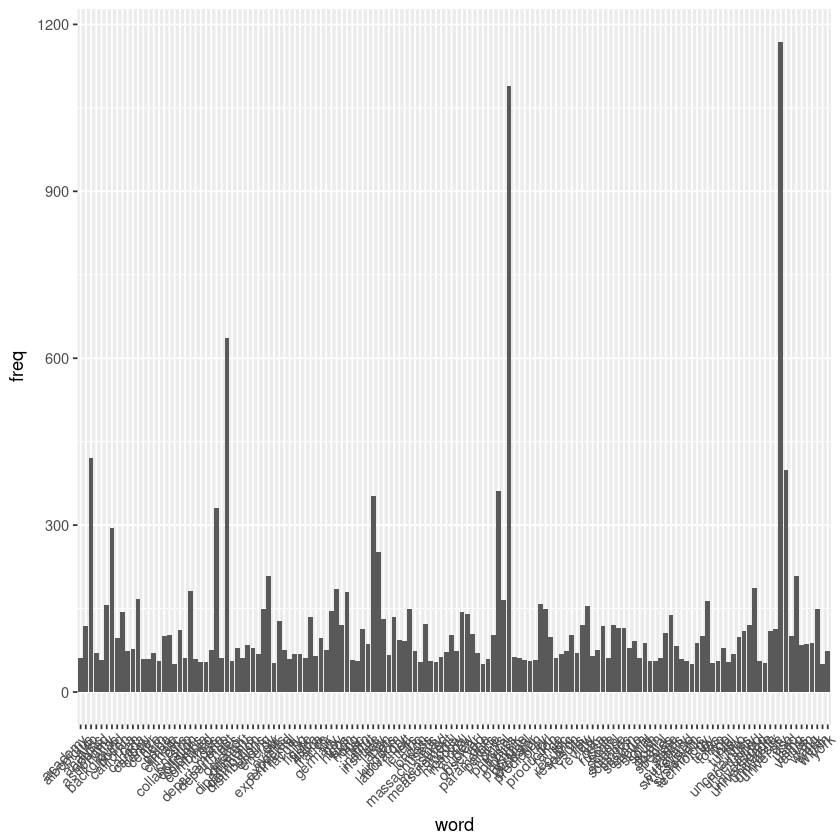

In [67]:
p <- ggplot(subset(wf, freq>50), aes(word, freq))    
p <- p + geom_bar(stat="identity")   
p <- p + theme(axis.text.x=element_text(angle=45, hjust=1))   
p  

In [68]:
findAssocs(dtm, c("question" , "analysi"), corlimit=0.98)

$question
numeric(0)

$analysi
numeric(0)

In [69]:
findAssocs(dtms, "contrast", corlimit=0.90)

$contrast
numeric(0)

In [70]:
library(wordcloud)   

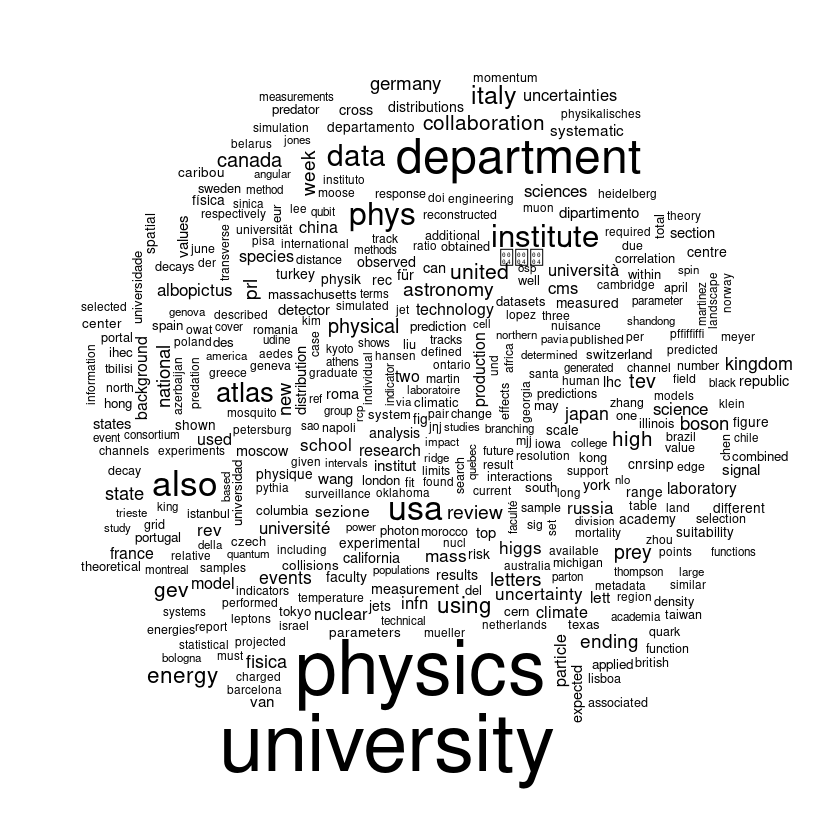

In [71]:
set.seed(142)   
wordcloud(names(freq), freq, min.freq=25)

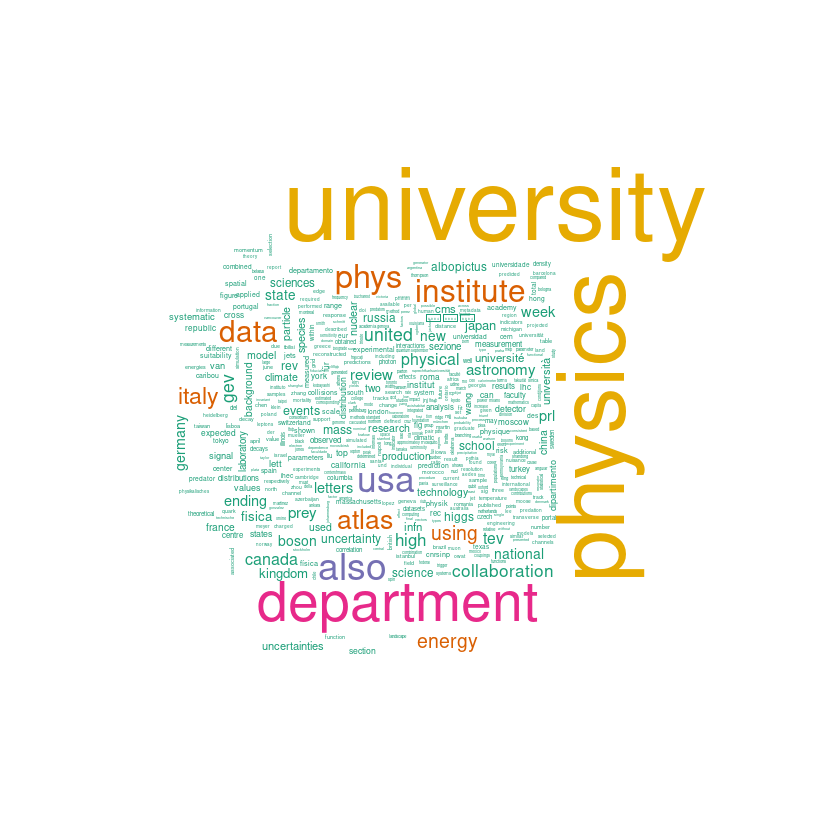

In [72]:
set.seed(142)   
wordcloud(names(freq), freq, min.freq=20, scale=c(5, .1), colors=brewer.pal(6, "Dark2"))  

In [73]:
set.seed(142)   
dark2 <- brewer.pal(6, "Dark2") 

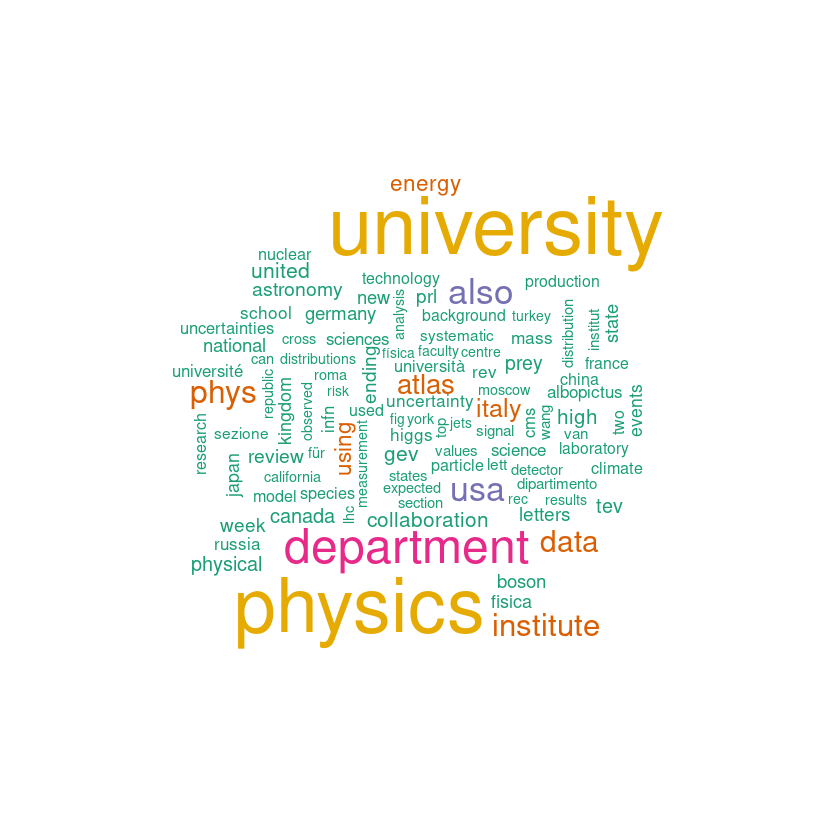

In [74]:
wordcloud(names(freq), freq, max.words=100, rot.per=0.2, colors=dark2) 

In [75]:
dtmss <- removeSparseTerms(dtm, 0.15)
inspect(dtmss)  

<<DocumentTermMatrix (documents: 11, terms: 76)>>
Non-/sparse entries: 784/52
Sparsity           : 6%
Maximal term length: 13
Weighting          : term frequency (tf)

              Terms
Docs           additional also analysis article author authors calcul canada
  character(0)          3   44        5       1      1       1      1     14
  character(0)         14   12       11       6      2       3      1     36
  character(0)          2    7        2       1      0       1      1      3
  character(0)          4    9       13       1      1       2      2     10
  character(0)          1   52        7       1      1       1      1     17
  character(0)          3   45       10       1      1       1      1     17
  character(0)          7   49        2       1      1       1      1     17
  character(0)          2   10        8       2      1       2      1     13
  character(0)          2   46        2       1      1       1      1     14
  character(0)          1   41        0   

In [76]:
library(cluster) 

In [77]:
d <- dist(t(dtmss), method="euclidian")   

In [78]:
fit <- hclust(d=d, method="ward") 
fit  

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



Call:
hclust(d = d, method = "ward")

Cluster method   : ward.D 
Distance         : euclidean 
Number of objects: 76 


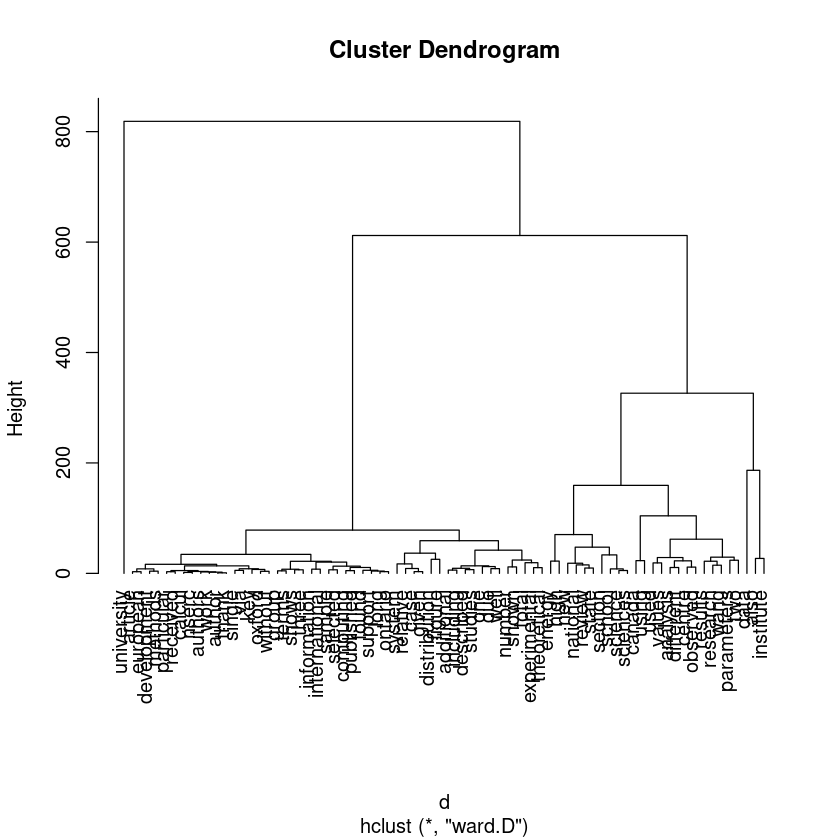

In [79]:
plot(fit, hang=-1)  

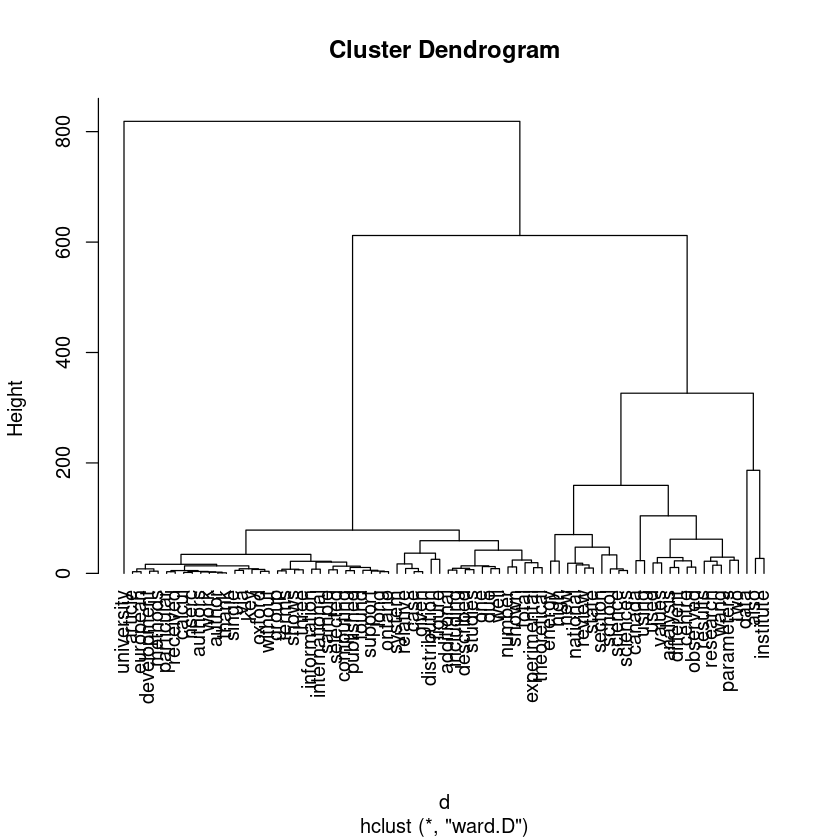

In [80]:
plot.new()
plot(fit, hang=-1)

In [81]:
rect.hclust(fit, k=5, border="red")

ERROR: Error in rect(m[which[n]] + 0.66, par("usr")[3L], m[which[n] + 1] + 0.33, : plot.new has not been called yet


In [82]:
library(fpc)  

In [83]:
d <- dist(t(dtmss), method="euclidian")   

In [84]:
kfit <- kmeans(d, 2)   

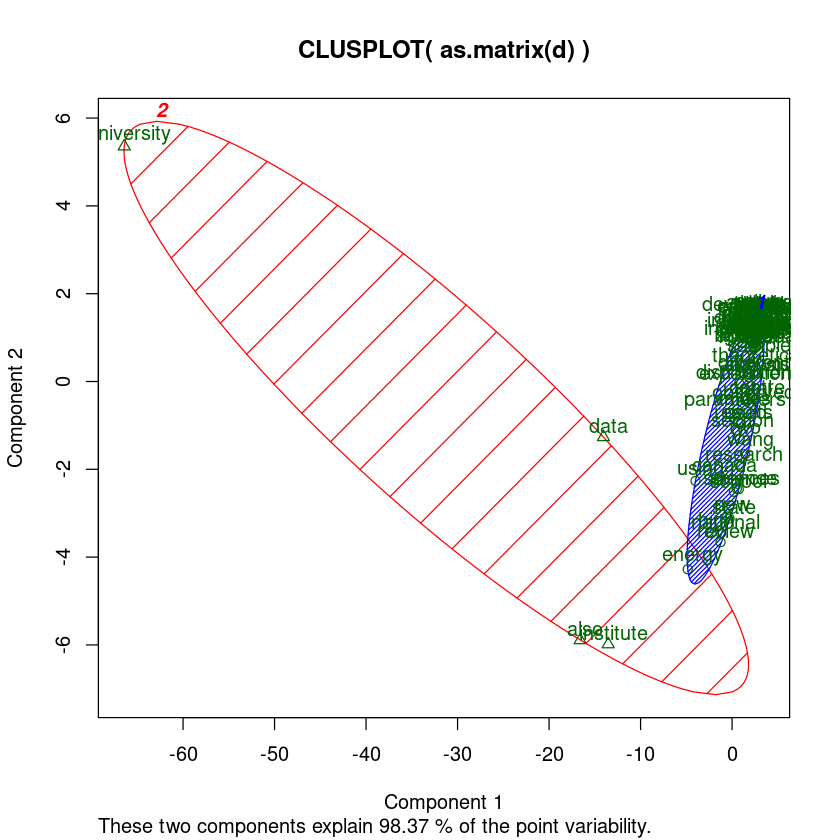

In [85]:
clusplot(as.matrix(d), kfit$cluster, color=T, shade=T, labels=2, lines=0)  
